<a href="https://colab.research.google.com/github/popka098/MLCalculator/blob/main/MLCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started

In [6]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading data

In [8]:
root = '/content/drive/MyDrive'
project_name = 'MLCalculator'
project_dir = None

for dirpath, dirnames, filenames in os.walk(root):
    if project_name in dirnames:
        project_dir = os.path.join(dirpath, project_name)
        break

if project_dir:
    print(f"Project directory: {project_dir}")
else:
    print("Project directory not found")

Project directory: /content/drive/MyDrive/ML/MLCalculator


In [10]:
csv_file = os.path.join(project_dir, "images.csv")
df = pd.read_csv(csv_file, dtype={'Target': str})
df.head()

,Target,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,3,2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,2,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data processing

In [11]:
df['Target'].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec',
       'div', 'eq', 'mul', 'sub', 'x', 'y', 'z'], dtype=object)

In [12]:
df.iloc[0].unique()

array(['0', np.int64(0), np.int64(1), np.int64(3), np.int64(2),
       np.int64(4), np.int64(68), np.int64(85), np.int64(83),
       np.int64(56), np.int64(17), np.int64(54), np.int64(221),
       np.int64(220), np.int64(206), np.int64(209), np.int64(223),
       np.int64(229), np.int64(203), np.int64(127), np.int64(29),
       np.int64(250), np.int64(119), np.int64(5), np.int64(34),
       np.int64(99), np.int64(198), np.int64(218), np.int64(18),
       np.int64(195), np.int64(157), np.int64(24), np.int64(23),
       np.int64(78), np.int64(237), np.int64(9), np.int64(177),
       np.int64(224), np.int64(27), np.int64(186), np.int64(132),
       np.int64(6), np.int64(227), np.int64(55), np.int64(204),
       np.int64(162), np.int64(38), np.int64(16), np.int64(20),
       np.int64(245), np.int64(92), np.int64(46), np.int64(225),
       np.int64(8), np.int64(90), np.int64(226), np.int64(22),
       np.int64(235), np.int64(39), np.int64(230), np.int64(31),
       np.int64(183), np.int64(1

In [13]:
df = df[~df['Target'].isin(['x', 'y', 'z'])]

df['Target'].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec',
       'div', 'eq', 'mul', 'sub'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9008 entries, 0 to 9007
Columns: 785 entries, Target to pixel_784
dtypes: int64(784), object(1)
memory usage: 54.0+ MB


In [15]:
X = df.drop(columns=['Target'])
y = df['Target']

div
----------


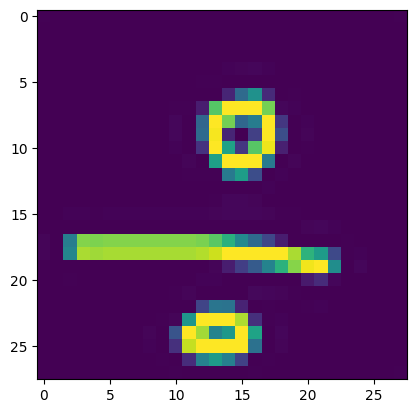

In [22]:
test_index = 6800
print(y.iloc[test_index])
print("-"*10)
plt.imshow(
    X.iloc[test_index].values.reshape((28, 28))
)

# Model train